In [98]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from loguru import logger

# OCR Only

In [99]:
notebook_path = Path().resolve().parent
print(notebook_path)

# Construct the filename relative to the new path
filename = notebook_path / "notebooks/new_data/df_standard_ocr_only_ch7.csv"

# Read the CSV file
df_standard_ocr_only = pd.read_csv(filename)
print(df_standard_ocr_only)

C:\Users\baatout\PycharmProjects\afm-vlm\experiments\second_experiment
                                               Prompt  GT_Keyframe  Top_1  \
0                                  What are feedlots?           47     47   
1                                 What is weathering?           17     19   
2   What is desertification and how much productiv...           22     22   
3   What is the conservation reserve programm of 1...           29     31   
4           GM crops today are engineered to resist:            56     56   
5   90% of energy is lost from one trophic level t...           45     45   
6                                Risks of biocontrol?           40     40   
7   As the populations increases pesticides lose t...           38     39   
8   Substainable fertilizer use involves monitorin...           36     36   
9                                What is overgrazing?           29     21   
10                   Why does the USDA issues labels?           71     63   
11   

In [100]:
import numpy as np


def total_top_3_percentage_plot(
    data_1, data_2, data_3, data_4, prox_1, prox_2, prox_3, prox_4
):
    def calculate_top_3_percentages(df):
        total = len(df)
        top_1_count = (df["GT_Keyframe"] == df["Top_1"]).sum()
        top_2_count = (df["GT_Keyframe"] == df["Top_2"]).sum()
        top_3_count = (df["GT_Keyframe"] == df["Top_3"]).sum()

        top_1_percentage = (top_1_count / total) * 100
        top_2_percentage = (top_2_count / total) * 100
        top_3_percentage = (top_3_count / total) * 100

        return top_1_percentage, top_2_percentage, top_3_percentage

    def count(data):
        count_greater_than_zero = sum(1 for x in data if x > 0)

        # Calculate the total number of elements
        total_elements = len(data)

        # Calculate the percentage
        percentage = (count_greater_than_zero / total_elements) * 100

        return percentage

    c_prox_1 = count(prox_1)
    c_prox_2 = count(prox_2)
    c_prox_3 = count(prox_3)
    c_prox_4 = count(prox_4)

    # Convert data to DataFrames
    df1 = pd.DataFrame(data_1)
    df2 = pd.DataFrame(data_2)
    df3 = pd.DataFrame(data_3)
    df4 = pd.DataFrame(data_4)

    # Calculate percentages for each DataFrame
    percentages_1 = calculate_top_3_percentages(df1)
    percentages_2 = calculate_top_3_percentages(df2)
    percentages_3 = calculate_top_3_percentages(df3)
    percentages_4 = calculate_top_3_percentages(df4)

    total_1 = sum(percentages_1)
    total_2 = sum(percentages_2)
    total_3 = sum(percentages_3)
    total_4 = sum(percentages_4)

    # Data for plotting
    labels = ["OCR Only", "OCR + LLaVa", "OCR + Transcriptions", "Extensive Summary"]
    percentages_group1 = [total_1, total_2, total_3, total_4]
    percentages_group2 = [c_prox_1, c_prox_2, c_prox_3, c_prox_4]

    x = np.arange(len(labels))  # Label locations
    width = 0.35  # Width of the bars

    # Create the plot
    fig, ax = plt.subplots(figsize=(8, 5))

    bars1 = ax.bar(
        x - width / 2,
        percentages_group1,
        width,
        label="Keyframe in Top 3 Positions",
        color="blue",
    )
    bars2 = ax.bar(
        x + width / 2,
        percentages_group2,
        width,
        label="Keyframe in Proximity Set",
        color="green",
    )

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_xlabel("Agriculture Lecture")
    ax.set_ylabel("Percentage")
    ax.set_title("Total Percentage of Extracted Keyframes to GT")
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    # Save the plot
    plt.savefig("total_top_3_percentage_plot_bar_ch7.png")
    # Show the plot
    plt.show()

In [101]:
def calculate_and_plot_gt_keyframe_percentage(data):
    # Convert data to a DataFrame
    df = pd.DataFrame(data)

    # Plotting
    plt.figure(figsize=(10, 6))

    total = len(df)
    top_1_count = 0
    top_2_count = 0
    top_3_count = 0

    # Iterate through the DataFrame to count the occurrences
    for index, row in df.iterrows():
        if row["GT_Keyframe"] == row["Top_1"]:
            top_1_count += 1
        elif row["GT_Keyframe"] == row["Top_2"]:
            top_2_count += 1
        elif row["GT_Keyframe"] == row["Top_3"]:
            top_3_count += 1

    # Calculate percentages
    top_1_percentage = (top_1_count / total) * 100
    top_2_percentage = (top_2_count / total) * 100
    top_3_percentage = (top_3_count / total) * 100

    # Print the results
    print(f"GT_Keyframe in Top 1: {top_1_percentage:.2f}%")
    print(f"GT_Keyframe in Top 2: {top_2_percentage:.2f}%")
    print(f"GT_Keyframe in Top 3: {top_3_percentage:.2f}%")

    # Data for plotting
    labels = ["Top 1", "Top 2", "Top 3"]
    percentages = [top_1_percentage, top_2_percentage, top_3_percentage]

    # Create the plot
    plt.figure(figsize=(8, 5))
    plt.bar(labels, percentages, color=["blue", "green", "red"])
    plt.xlabel("Position")
    plt.ylabel("Percentage")
    plt.title("Percentage of GT_Keyframe in Top Positions \n (OCR Only)")
    plt.ylim(0, 100)


img_paths = 150


def check_proximity_keyframes(gt):
    proximity_kf = []

    # Define the boundaries for the image paths
    max_index = img_paths - 1

    if gt == 0:
        logger.info("No proximity - Invalid GT")
    elif gt == 1:
        proximity_kf.extend(range(1, 5))
    elif gt >= max_index:
        proximity_kf.extend(range(max_index, max_index - 5, -1))
    else:
        proximity_kf.extend([gt - 2, gt - 1, gt, gt + 1, gt + 2])

    # Ensure all indexes are within valid range
    proximity_kf = [i for i in proximity_kf if 0 <= i <= max_index]

    return proximity_kf

GT_Keyframe in Top 1: 57.14%
GT_Keyframe in Top 2: 9.52%
GT_Keyframe in Top 3: 9.52%


<Figure size 1000x600 with 0 Axes>

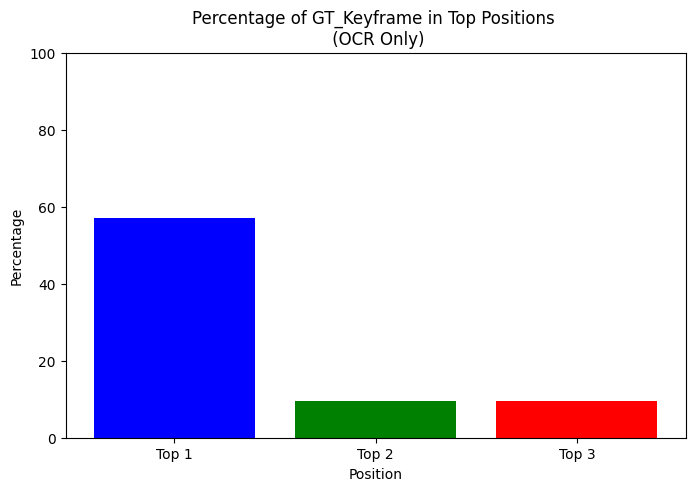

In [102]:
# call
calculate_and_plot_gt_keyframe_percentage(df_standard_ocr_only)

In [103]:
# iterate through data frame
df = df_standard_ocr_only
res = []
for _, row in df.iterrows():
    logger.info(row["Prompt"])
    gt_keyframe = row["GT_Keyframe"]
    prox = check_proximity_keyframes(gt_keyframe)
    res.append(prox)

prox_yes_no_ocr_only = []
for i, row in df.iterrows():
    if row["Top_1"] in res[i]:
        prox_yes_no_ocr_only.append(1)
    elif row["Top_2"] in res[i]:
        prox_yes_no_ocr_only.append(2)
    elif row["Top_3"] in res[i]:
        prox_yes_no_ocr_only.append(3)
    else:
        prox_yes_no_ocr_only.append(0)

print(prox_yes_no_ocr_only)
print(len(prox_yes_no_ocr_only))

2024-07-14 17:54:45.702 | INFO     | __main__:<module>:5 - What are feedlots?
2024-07-14 17:54:45.704 | INFO     | __main__:<module>:5 - What is weathering?
2024-07-14 17:54:45.704 | INFO     | __main__:<module>:5 - What is desertification and how much productivity loss does it cause to arid lands?
2024-07-14 17:54:45.704 | INFO     | __main__:<module>:5 - What is the conservation reserve programm of 1985?
2024-07-14 17:54:45.704 | INFO     | __main__:<module>:5 - GM crops today are engineered to resist: 
2024-07-14 17:54:45.711 | INFO     | __main__:<module>:5 - 90% of energy is lost from one trophic level to the next
2024-07-14 17:54:45.714 | INFO     | __main__:<module>:5 - Risks of biocontrol?
2024-07-14 17:54:45.715 | INFO     | __main__:<module>:5 - As the populations increases pesticides lose their effectiveness
2024-07-14 17:54:45.717 | INFO     | __main__:<module>:5 - Substainable fertilizer use involves monitoring and targeting nutriets
2024-07-14 17:54:45.718 | INFO     | __

[1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 0, 1, 3, 1, 0, 0, 1, 1, 1]
21


# OCR LAVA

In [104]:
# read data from csv file
notebook_path = Path().resolve().parent
print(notebook_path)

# Construct the filename relative to the new path
filename = notebook_path / "notebooks/new_data/df_standard_ocr_lava_ch7.csv"
df_ocr_lava = pd.read_csv(filename)
df_ocr_lava.head()

C:\Users\baatout\PycharmProjects\afm-vlm\experiments\second_experiment


,Prompt,GT_Keyframe,Top_1,Top_2,Top_3
0,What are feedlots?,47,47,54,48
1,What is weathering?,17,19,26,23
2,What is desertification and how much productiv...,22,22,20,32
3,What is the conservation reserve programm of 1...,29,31,24,27
4,GM crops today are engineered to resist:,56,56,11,60


GT_Keyframe in Top 1: 52.38%
GT_Keyframe in Top 2: 14.29%
GT_Keyframe in Top 3: 4.76%


<Figure size 1000x600 with 0 Axes>

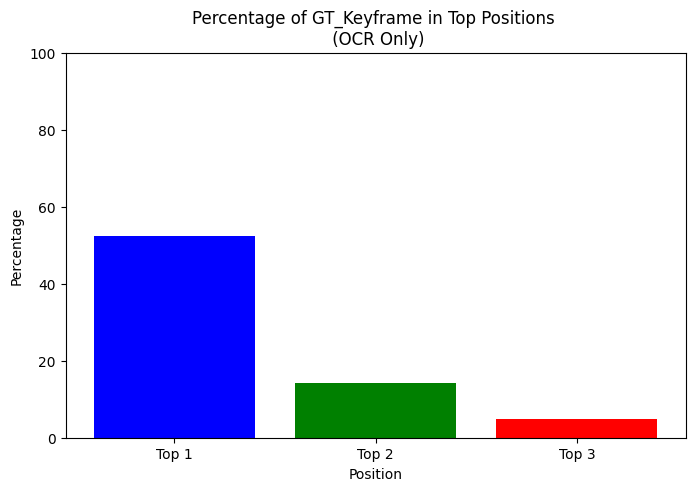

In [105]:
# call
calculate_and_plot_gt_keyframe_percentage(df_ocr_lava)

In [106]:
# iterate through data frame
df = df_ocr_lava
# iterate through data frame
res = []
for _, row in df.iterrows():
    logger.info(row["Prompt"])
    gt_keyframe = row["GT_Keyframe"]
    prox = check_proximity_keyframes(gt_keyframe)
    res.append(prox)

prox_yes_no_ocr_lava = []
for i, row in df.iterrows():
    if row["Top_1"] in res[i]:
        prox_yes_no_ocr_lava.append(1)
    elif row["Top_2"] in res[i]:
        prox_yes_no_ocr_lava.append(2)
    elif row["Top_3"] in res[i]:
        prox_yes_no_ocr_lava.append(3)
    else:
        prox_yes_no_ocr_lava.append(0)

print(prox_yes_no_ocr_lava)

2024-07-14 17:54:45.955 | INFO     | __main__:<module>:6 - What are feedlots?
2024-07-14 17:54:45.959 | INFO     | __main__:<module>:6 - What is weathering?
2024-07-14 17:54:45.961 | INFO     | __main__:<module>:6 - What is desertification and how much productivity loss does it cause to arid lands?
2024-07-14 17:54:45.961 | INFO     | __main__:<module>:6 - What is the conservation reserve programm of 1985?
2024-07-14 17:54:45.963 | INFO     | __main__:<module>:6 - GM crops today are engineered to resist: 
2024-07-14 17:54:45.965 | INFO     | __main__:<module>:6 - 90% of energy is lost from one trophic level to the next
2024-07-14 17:54:45.965 | INFO     | __main__:<module>:6 - Risks of biocontrol?
2024-07-14 17:54:45.967 | INFO     | __main__:<module>:6 - As the populations increases pesticides lose their effectiveness
2024-07-14 17:54:45.967 | INFO     | __main__:<module>:6 - Substainable fertilizer use involves monitoring and targeting nutriets
2024-07-14 17:54:45.969 | INFO     | __

[1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 3, 2, 0, 0, 1, 1, 1]


# LLM Long Summary

In [107]:
# read data from csv file
notebook_path = Path().resolve().parent
print(notebook_path)

# Construct the filename relative to the new path
filename = notebook_path / "notebooks/new_data/df_standard_llm_long_summary_ch7.csv"
df_long_summary = pd.read_csv(filename)
df_long_summary.head()

C:\Users\baatout\PycharmProjects\afm-vlm\experiments\second_experiment


,Prompt,GT_Keyframe,Top_1,Top_2,Top_3
0,What are feedlots?,47,47,48,54
1,What is weathering?,17,27,26,23
2,What is desertification and how much productiv...,22,22,29,21
3,What is the conservation reserve programm of 1...,29,31,24,72
4,GM crops today are engineered to resist:,56,56,11,58


GT_Keyframe in Top 1: 71.43%
GT_Keyframe in Top 2: 4.76%
GT_Keyframe in Top 3: 4.76%


<Figure size 1000x600 with 0 Axes>

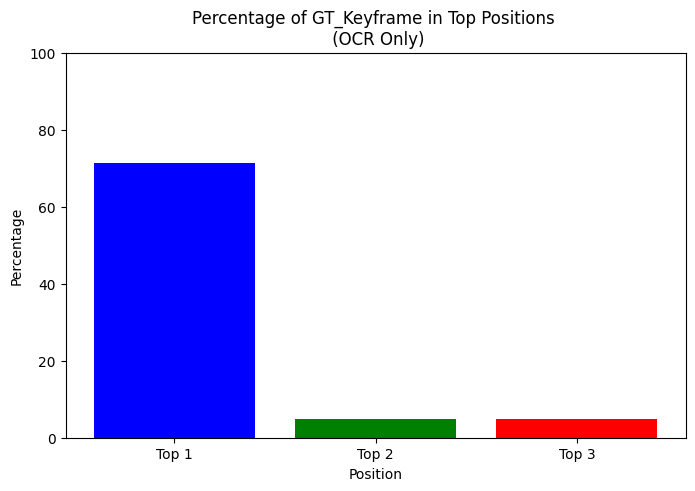

In [108]:
# call
calculate_and_plot_gt_keyframe_percentage(df_long_summary)

In [109]:
# iterate through data frame
df = df_long_summary
res = []
for _, row in df.iterrows():
    logger.info(row["Prompt"])
    gt_keyframe = row["GT_Keyframe"]
    prox = check_proximity_keyframes(gt_keyframe)
    res.append(prox)

prox_yes_no_long_summary = []
for i, row in df.iterrows():
    if row["Top_1"] in res[i]:
        prox_yes_no_long_summary.append(1)
    elif row["Top_2"] in res[i]:
        prox_yes_no_long_summary.append(2)
    elif row["Top_3"] in res[i]:
        prox_yes_no_long_summary.append(3)
    else:
        prox_yes_no_long_summary.append(0)

print(prox_yes_no_long_summary)

2024-07-14 17:54:46.223 | INFO     | __main__:<module>:5 - What are feedlots?
2024-07-14 17:54:46.223 | INFO     | __main__:<module>:5 - What is weathering?
2024-07-14 17:54:46.223 | INFO     | __main__:<module>:5 - What is desertification and how much productivity loss does it cause to arid lands?
2024-07-14 17:54:46.223 | INFO     | __main__:<module>:5 - What is the conservation reserve programm of 1985?
2024-07-14 17:54:46.233 | INFO     | __main__:<module>:5 - GM crops today are engineered to resist: 
2024-07-14 17:54:46.233 | INFO     | __main__:<module>:5 - 90% of energy is lost from one trophic level to the next
2024-07-14 17:54:46.233 | INFO     | __main__:<module>:5 - Risks of biocontrol?
2024-07-14 17:54:46.237 | INFO     | __main__:<module>:5 - As the populations increases pesticides lose their effectiveness
2024-07-14 17:54:46.237 | INFO     | __main__:<module>:5 - Substainable fertilizer use involves monitoring and targeting nutriets
2024-07-14 17:54:46.238 | INFO     | __

[1, 0, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 0, 1, 2, 1, 0, 1, 1, 1, 1]


# OCR TRANSCRIPTIONS 

In [110]:
filename = (
    notebook_path / "notebooks/new_data/df_standard_df_ocr_transcriptions_ch7.csv"
)

df_ocr_transcriptions = pd.read_csv(filename)
df_ocr_transcriptions.head()

,Prompt,GT_Keyframe,Top_1,Top_2,Top_3
0,What are feedlots?,47,47,48,17
1,What is weathering?,17,19,27,21
2,What is desertification and how much productiv...,22,22,21,20
3,What is the conservation reserve programm of 1...,29,31,24,26
4,GM crops today are engineered to resist:,56,56,11,60


GT_Keyframe in Top 1: 66.67%
GT_Keyframe in Top 2: 9.52%
GT_Keyframe in Top 3: 4.76%


<Figure size 1000x600 with 0 Axes>

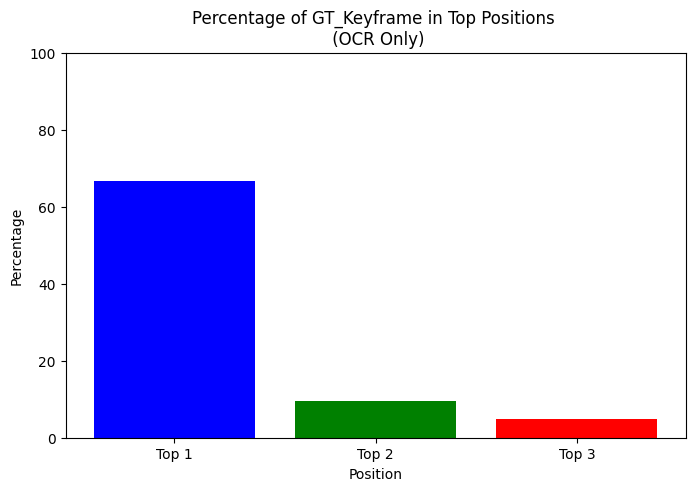

In [111]:
# call
calculate_and_plot_gt_keyframe_percentage(df_ocr_transcriptions)

In [112]:
df = df_ocr_transcriptions
res = []
for _, row in df.iterrows():
    logger.info(row["Prompt"])
    gt_keyframe = row["GT_Keyframe"]
    prox = check_proximity_keyframes(gt_keyframe)
    res.append(prox)

prox_yes_no_ocr_transcriptions = []
for i, row in df.iterrows():
    if row["Top_1"] in res[i]:
        prox_yes_no_ocr_transcriptions.append(1)
    elif row["Top_2"] in res[i]:
        prox_yes_no_ocr_transcriptions.append(2)
    elif row["Top_3"] in res[i]:
        prox_yes_no_ocr_transcriptions.append(3)
    else:
        prox_yes_no_ocr_transcriptions.append(0)

print(prox_yes_no_ocr_transcriptions)

2024-07-14 17:54:46.495 | INFO     | __main__:<module>:4 - What are feedlots?
2024-07-14 17:54:46.495 | INFO     | __main__:<module>:4 - What is weathering?
2024-07-14 17:54:46.501 | INFO     | __main__:<module>:4 - What is desertification and how much productivity loss does it cause to arid lands?
2024-07-14 17:54:46.501 | INFO     | __main__:<module>:4 - What is the conservation reserve programm of 1985?
2024-07-14 17:54:46.504 | INFO     | __main__:<module>:4 - GM crops today are engineered to resist: 
2024-07-14 17:54:46.504 | INFO     | __main__:<module>:4 - 90% of energy is lost from one trophic level to the next
2024-07-14 17:54:46.504 | INFO     | __main__:<module>:4 - Risks of biocontrol?
2024-07-14 17:54:46.504 | INFO     | __main__:<module>:4 - As the populations increases pesticides lose their effectiveness
2024-07-14 17:54:46.504 | INFO     | __main__:<module>:4 - Substainable fertilizer use involves monitoring and targeting nutriets
2024-07-14 17:54:46.504 | INFO     | __

[1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 0, 1, 2, 1, 0, 1, 1, 1, 1]


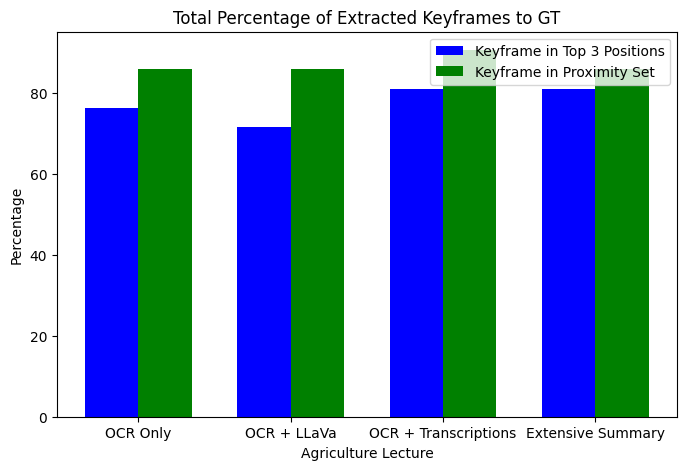

In [113]:
total_top_3_percentage_plot(
    df_standard_ocr_only,
    df_ocr_lava,
    df_ocr_transcriptions,
    df_long_summary,
    prox_yes_no_ocr_only,
    prox_yes_no_ocr_lava,
    prox_yes_no_ocr_transcriptions,
    prox_yes_no_long_summary,
)
# save the plot on disk